In [1]:
from pandas_datareader import data, wb
import pandas as pd
import requests
import json
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
start='2021-01-04'
end='2021-06-27'
bitcoin_prices_dict=json.loads(requests.get('https://api.coindesk.com/v1/bpi/historical/close.json?start='+start+'&end='+end).text)['bpi']

In [5]:
s=pd.Series(bitcoin_prices_dict, name='Bitcoin Price (USD)')
s.index.name='Date'
s.reset_index()
bitcoin_prices=pd.DataFrame(s)
bitcoin_prices.head()

,Bitcoin Price (USD)
Date,
2021-01-04,32017.5650
2021-01-05,34035.0067
2021-01-06,36826.9783
2021-01-07,39475.6067
2021-01-08,40616.7217


/opt/conda/lib/python3.6/site-packages/pandas/plotting/_core.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

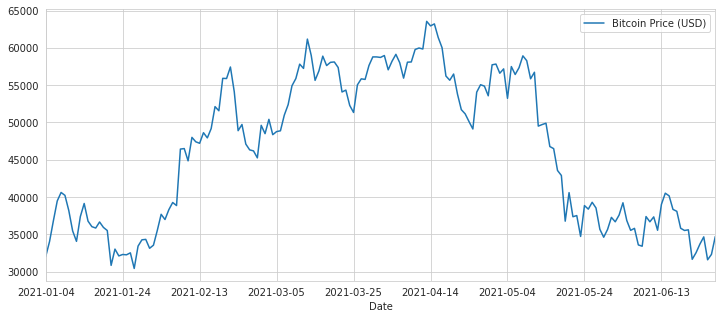

In [5]:
bitcoin_prices.plot(figsize=(12,5))

In [6]:
bitcoin_prices.describe()

,Bitcoin Price (USD)
count,175.000000
mean,46303.696799
std,9844.100181
min,30425.393300
25%,36767.820800
50%,47410.403300
75%,55910.785000
max,63564.833300


In [7]:
#投報率
bitcoin_prices['returns']=bitcoin_prices/bitcoin_prices.shift(1)
bitcoin_prices['log_returns']=np.log(bitcoin_prices['returns'])

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_core.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

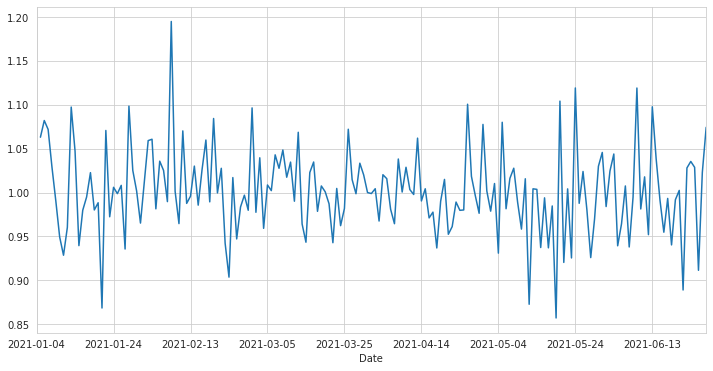

In [8]:
bitcoin_prices['returns'].plot(kind='line',figsize=(12,6))

In [9]:
m=loc=bitcoin_prices['log_returns'][1:].mean()
s=loc=bitcoin_prices['log_returns'][1:].std()

In [10]:
stats.normaltest(bitcoin_prices['log_returns'], nan_policy='omit')

NormaltestResult(statistic=5.876945496806879, pvalue=0.05294652969295713)

/opt/conda/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log Returns of Bitcoin')

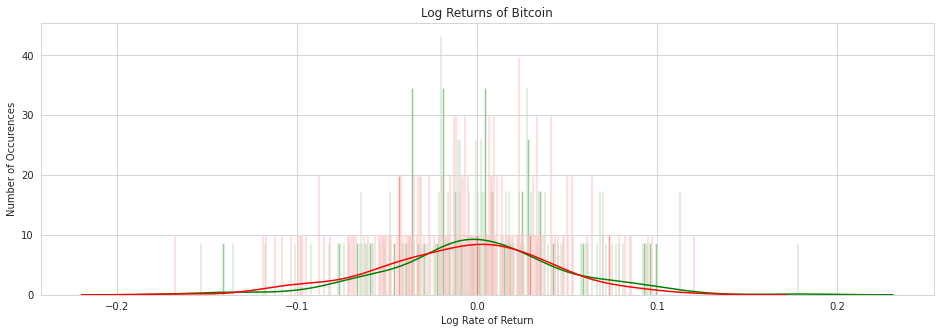

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,5))
sns.distplot(bitcoin_prices['log_returns'][1:], bins=500, color='green')
sns.distplot(stats.norm.rvs(m,s,len(bitcoin_prices)-1), color='red', bins=500)
plt.xlabel('Log Rate of Return')
plt.ylabel('Number of Occurences')
plt.title('Log Returns of Bitcoin')

In [12]:
stats.kstest((bitcoin_prices['log_returns'][1:]-m)/s,cdf=stats.distributions.norm.cdf)

KstestResult(statistic=0.07822389268183563, pvalue=0.22536310365924084)

In [13]:
from statsmodels.stats.diagnostic import lilliefors

In [14]:
lilliefors(bitcoin_prices['log_returns'][1:])

(0.07822389268183563, 0.017993768883332914)

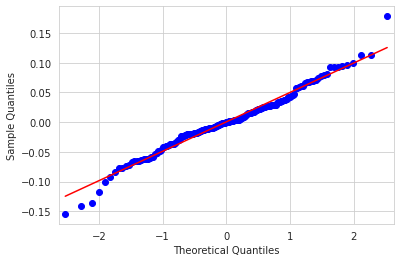

In [15]:
plt.show(sm.qqplot(bitcoin_prices['log_returns'][1:],line='s'))

/opt/conda/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log Returns of Bitcoin')

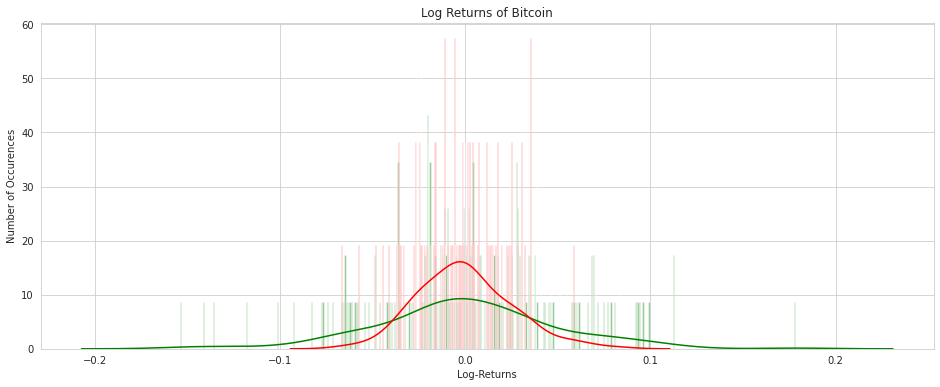

In [16]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,6))
sns.distplot(bitcoin_prices['log_returns'][1:], bins=500, color='green')
sns.distplot(stats.norm.rvs(m,s/2,len(bitcoin_prices['log_returns'])-1), color='red', bins=500)
plt.xlabel('Log-Returns')
plt.ylabel('Number of Occurences')
plt.title('Log Returns of Bitcoin')

In [17]:
stats.kstest((bitcoin_prices['log_returns'][1:]-m)*2/s,cdf=stats.distributions.norm.cdf)

KstestResult(statistic=0.13890129518856947, pvalue=0.002166730195723263)

In [18]:
bitcoin_prices.index=pd.to_datetime(bitcoin_prices.index)

In [19]:
bitcoin_prices.head()

,Bitcoin Price (USD),returns,log_returns
Date,,,
2021-01-04,32017.5650,NaN,NaN
2021-01-05,34035.0067,1.063010,0.061105
2021-01-06,36826.9783,1.082032,0.078841
2021-01-07,39475.6067,1.071921,0.069452
2021-01-08,40616.7217,1.028907,0.028497


In [20]:
type(bitcoin_prices.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [21]:
bitcoin_prices.describe()

,Bitcoin Price (USD),returns,log_returns
count,175.000000,174.000000,174.000000
mean,46303.696799,1.001686,0.000464
std,9844.100181,0.049709,0.049549
min,30425.393300,0.857080,-0.154224
25%,36767.820800,0.977891,-0.022357
50%,47410.403300,0.999761,-0.000239
75%,55910.785000,1.027681,0.027305
max,63564.833300,1.194886,0.178051


In [22]:
standard_deviations=bitcoin_prices.groupby([bitcoin_prices.index.year,bitcoin_prices.index.week]).std()

In [23]:
standard_deviations.index.names=['Year','Week']

In [24]:
standard_deviations.head()

Bitcoin Price (USD)   returns  log_returns
Year Week                                            
2021 1             3262.849212  0.052184     0.051370
     2             1601.212143  0.060653     0.060054
     3             2240.546028  0.061856     0.064390
     4             1347.652705  0.050980     0.050156
     5             2029.239208  0.031220     0.030559

In [25]:
from sklearn import cluster

In [26]:
X =np.asarray(standard_deviations['returns']).reshape(-1,1)

In [27]:
distortions=[]
for k in range(2,20):
    distortions.append(cluster.KMeans(n_clusters=k).fit(X).inertia_)

In [28]:
print(distortions)

[0.0020304441772510022, 0.0008758205181147061, 0.0005118328462378121, 0.00026845145911929776, 0.00016649491698276283, 8.339885158042966e-05, 5.1843213728122966e-05, 3.2695026593061315e-05, 1.585047415886221e-05, 1.0600063526505674e-05, 5.501855102210652e-06, 4.2834637023552325e-06, 3.1348286611822206e-06, 2.2105524903581872e-06, 1.5499015158136908e-06, 1.0107352206735242e-06, 6.294811762676091e-07, 2.6896514242653595e-07]


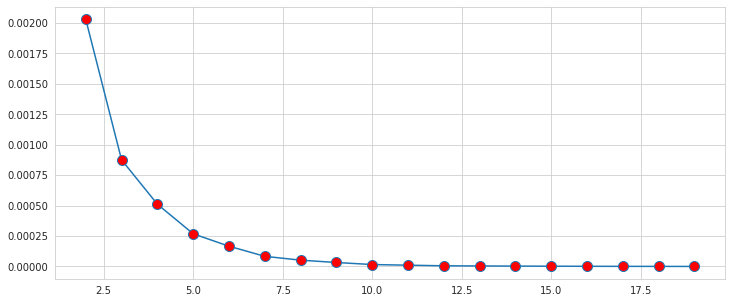

In [29]:
plt.figure(figsize=(12,5))
plt.plot(range(2,20), distortions, marker='o', markerfacecolor='red', markersize=10)

In [30]:
kmeans=cluster.KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [31]:
print(kmeans.cluster_centers_)

[[0.02255206]
 [0.06119257]
 [0.04912558]
 [0.07405054]
 [0.03608005]]


In [32]:
standard_deviations['cluster_center']=list(map(lambda x: kmeans.cluster_centers_[x][0], kmeans.predict(X)))

In [33]:
standard_deviations.head()

Bitcoin Price (USD)   returns  log_returns  cluster_center
Year Week                                                            
2021 1             3262.849212  0.052184     0.051370        0.049126
     2             1601.212143  0.060653     0.060054        0.061193
     3             2240.546028  0.061856     0.064390        0.061193
     4             1347.652705  0.050980     0.050156        0.049126
     5             2029.239208  0.031220     0.030559        0.036080

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_core.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0, 0.5, 'Volatility')

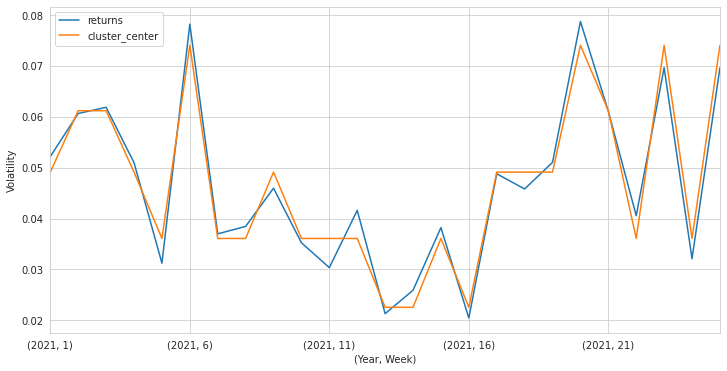

In [34]:
standard_deviations[['returns','cluster_center']].plot(figsize=(12,6))
plt.xlabel('(Year, Week)')
plt.ylabel('Volatility')

In [35]:
d_for_clusters={}
for i in range(5):
    d_for_clusters['Cluster '+str(i)] = [list(kmeans.predict(X)).count(i),kmeans.cluster_centers_[i][0]]

In [36]:
pd.DataFrame(d_for_clusters,columns=['Cluster '+str(i) for i in range(5)],
                       index=['Number of Points','Center'])

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
Number of Points,3.000000,3.000000,6.000000,4.000000,9.00000
Center,0.022552,0.061193,0.049126,0.074051,0.03608


In [38]:
d_counts={}
for k in range(5):
    for j in range(5):
        d_counts[(j,k)]=0 
L=list(kmeans.predict(X))
for i in range(len(L)-1):
    d_counts[(L[i],L[i+1])]+=1

In [40]:
prob_matrix=np.zeros((5,5))
for i in range(5):
    for j in range(5):
        prob_matrix[i,j]+=d_counts[(i,j)]
sums=[sum(prob_matrix[i]) for i in range(5)]
for i in range(5):
    prob_matrix[i]/=sums[i]
prob_matrix=prob_matrix.round(2)*100
prob_matrix=np.char.add(prob_matrix.astype(int).astype(str),'%')
cluster_switching_probs = pd.DataFrame(prob_matrix, columns=['Cluster '+str(i) for i in range(5)],
             index=['Cluster '+str(i) for i in range(5)])
cluster_switching_probs.index.name, cluster_switching_probs.columns.name='From', 'To'
cluster_switching_probs['Center']=kmeans.cluster_centers_.round(3)
cluster_switching_probs

To,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Center
From,,,,,,
Cluster 0,33%,0%,33%,0%,33%,0.023
Cluster 1,0%,33%,33%,0%,33%,0.061
Cluster 2,0%,17%,33%,17%,33%,0.049
Cluster 3,0%,33%,0%,0%,67%,0.074
Cluster 4,22%,0%,11%,33%,33%,0.036


In [55]:
monthly_distributions=[]
for i in range(2010,2020):
    for j in range(1,13):
        monthly_distributions.append(
            bitcoin_prices[(bitcoin_prices.index.year==i)&(bitcoin_prices.index.month==j)])
monthly_distributions=monthly_distributions[7:-2]

In [56]:
n=len(monthly_distributions)
KS_matrix=np.zeros((n,n))
for i in range(n):
    for j in range(n):
        KS_matrix[i,j]+=stats.ks_2samp(monthly_distributions[i]['returns'], 
                                       monthly_distributions[j]['returns'])[0]

ValueError: Data passed to ks_2samp must not be empty